# First Order Improved Weighted Fuzzy Time Series by Efendi, Ismail and Deris (2013)

R. Efendi, Z. Ismail, and M. M. Deris, “Improved weight Fuzzy Time Series as used in the exchange rates forecasting of 
US Dollar to Ringgit Malaysia,” Int. J. Comput. Intell. Appl., vol. 12, no. 1, p. 1350005, 2013.

# Common Imports

In [1]:
import matplotlib.pylab as plt
from pyFTS.benchmarks import benchmarks as bchmk
from pyFTS.models import ismailefendi

from pyFTS.common import Transformations
tdiff = Transformations.Differential(1)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/usr/lib/python3/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Data Loading

In [2]:
from pyFTS.data import Enrollments

enrollments = Enrollments.get_data()

# Exploring the partitioning effects on original data

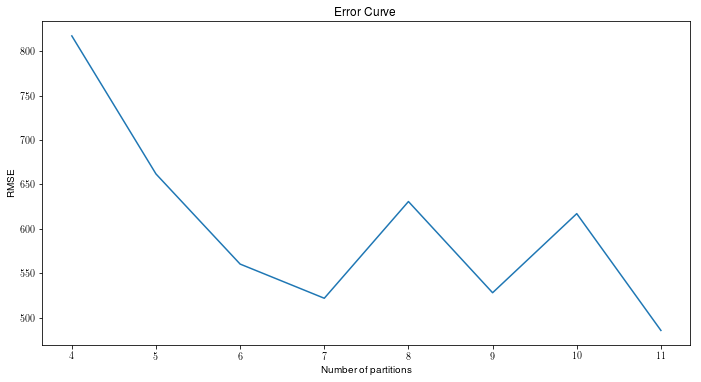

In [3]:
tmp = bchmk.simpleSearch_RMSE(enrollments, enrollments, ismailefendi.ImprovedWeightedFTS, 
                              range(4,12), [1], tam=[10, 5])

# Exploring the partitioning effects on transformed data

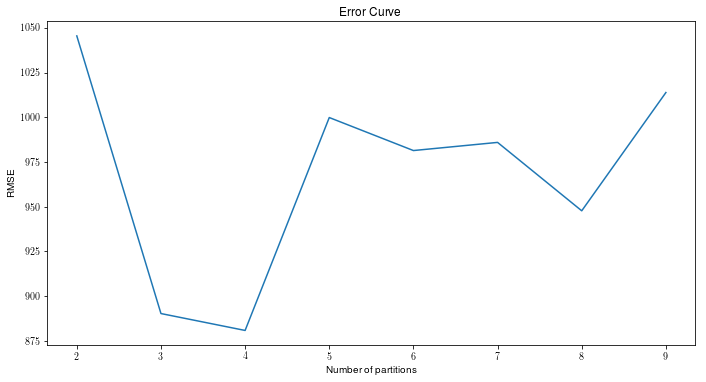

In [4]:
tmp = bchmk.simpleSearch_RMSE(enrollments, enrollments, ismailefendi.ImprovedWeightedFTS, 
                              range(2,10), [1], transformation=tdiff, tam=[10, 5])

# Comparing the partitioning schemas

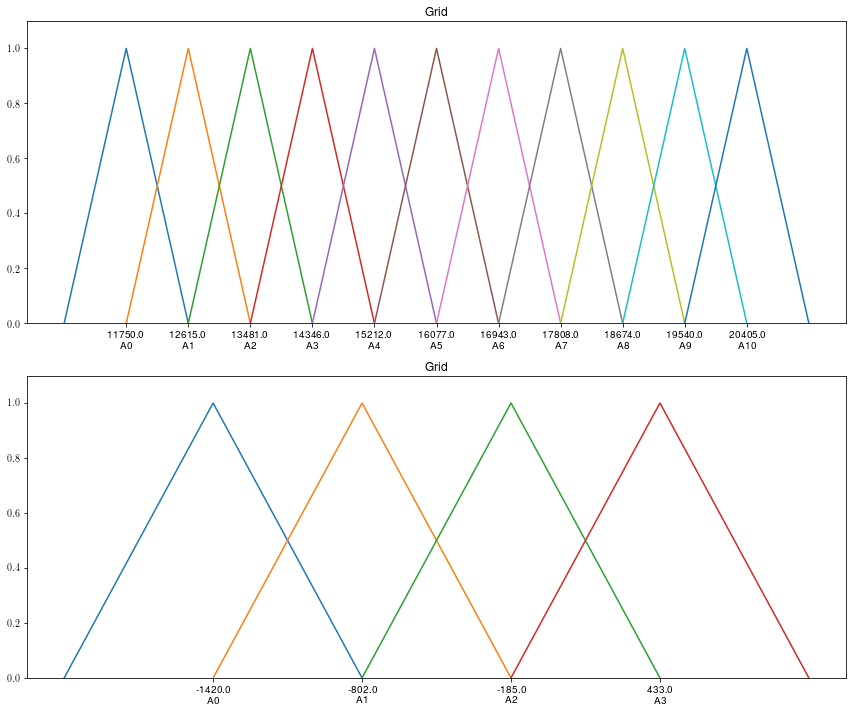

In [6]:
from pyFTS.partitioners import Grid, Util as pUtil

fuzzy_sets = Grid.GridPartitioner(data=enrollments, npart=11)
fuzzy_sets2 = Grid.GridPartitioner(data=enrollments, npart=4, transformation=tdiff)

pUtil.plot_partitioners(enrollments, [fuzzy_sets,fuzzy_sets2])

# Fitting a model on original data

In [7]:
model1 = ismailefendi.ImprovedWeightedFTS("FTS", partitioner=fuzzy_sets)
model1.fit(enrollments)

print(model1)

[ 17:08:54] Start training
[ 17:08:54] Finish training
Improved Weighted FTS:
A2 -> A2(0.667),A3(0.333)
A3 -> A4(1.0)
A4 -> A4(0.714),A5(0.286)
A5 -> A4(0.333),A6(0.667)
A6 -> A5(0.333),A6(0.333),A7(0.333)
A7 -> A8(1.0)
A8 -> A9(1.0)
A9 -> A8(0.5),A9(0.5)



# Fitting a model on transformed data

In [8]:
model2 = ismailefendi.ImprovedWeightedFTS("FTS Diff", partitioner=fuzzy_sets2)
model2.append_transformation(tdiff)
model2.fit(enrollments)

print(model2)

[ 17:09:19] Start training
[ 17:09:19] Finish training
Improved Weighted FTS:
A0 -> A1(1.0)
A1 -> A0(0.143),A1(0.286),A2(0.429),A3(0.143)
A2 -> A1(0.444),A2(0.222),A3(0.333)
A3 -> A2(0.75),A3(0.25)



# Using the models

In [9]:
model1.predict(enrollments)

[13769.148484848485,
 13769.148484848485,
 13769.148484848485,
 15211.754545454547,
 15459.058441558444,
 15459.058441558444,
 15459.058441558444,
 16365.839393939395,
 16942.88181818182,
 16942.88181818182,
 16365.839393939395,
 15459.058441558444,
 15459.058441558444,
 15459.058441558444,
 15459.058441558444,
 16365.839393939395,
 16942.88181818182,
 18674.009090909094,
 19539.57272727273,
 19106.790909090912,
 19106.790909090912,
 19539.57272727273]

In [10]:
model2.predict(enrollments)

[12801.572222222223,
 13113.492857142857,
 13613.572222222223,
 14246.492857142857,
 15010.492857142857,
 15280.6125,
 15349.572222222223,
 15607.572222222223,
 16357.492857142857,
 16665.57222222222,
 16357.6125,
 15402.6125,
 15243.572222222223,
 15114.6125,
 14909.572222222223,
 15534.492857142857,
 16409.492857142857,
 17347.55,
 18520.492857142857,
 19074.57222222222,
 19083.57222222222,
 18845.6125]

# Comparing the models

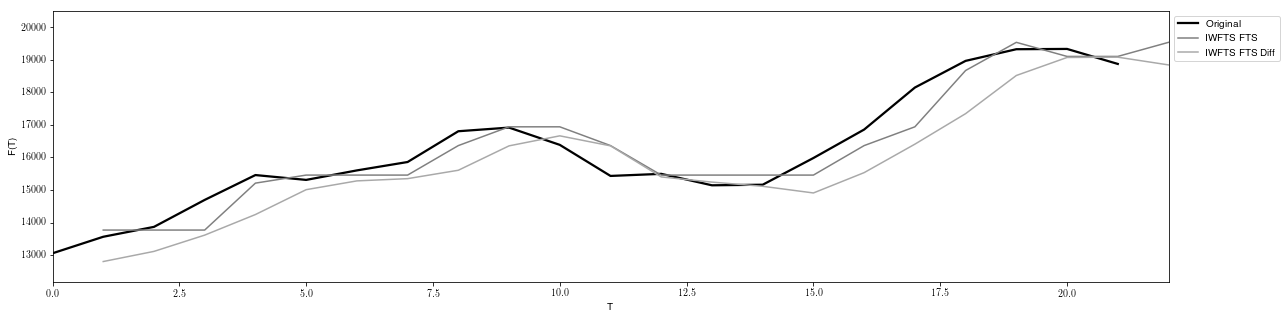

In [11]:
bchmk.plot_compared_series(enrollments, [model1, model2], bchmk.colors, intervals=False)

In [12]:
bchmk.print_point_statistics(enrollments, [model1, model2])

Model		& Order     & RMSE		& SMAPE      & Theil's U		\\ 
IWFTS FTS		& 1		& 485.63		& 1.17		& 0.79	\\ 
IWFTS FTS Diff		& 1		& 880.72		& 2.27		& 1.44	\\ 



# Residual Analysis

In [ ]:
from pyFTS.benchmarks import ResidualAnalysis as ra

ra.plot_residuals(enrollments, [model1, model2])